# 3D SARS-CoV-19 Protein Visualisation With Biopython

# Table of contents:<br>
1. [Attributes of Biopython](#1.-Attributes-of-Biopython)
2. [Understand FASTA file format](#2.-Understanding-FASTA-file-format)
3. [Sequence manipulation using Biopython](#3.-Sequence-manipulation-using-Biopython)
4. [Transcription & Translation studies](#4.-Transcription-&-Translation-Studies)
5. [Perform Basic Local Alignment using NCBI-BLAST](#5.-Basic-Local-Alignment-Using-NCBI-BLAST)
6. [Reading PDB file](#6.-Reading-PDB-file)
7. [Visualizing SARS-CoV-19 Protein structure](#7.-Visualizing-SARS-CoV-19-Protein-structure)

In [56]:
pip install biopython

In [57]:
pip install nglview

## Modules

In [58]:
import Bio
import pylab
import urllib
import pandas as pd
import nglview as nv
from Bio.Blast import NCBIWWW
from Bio.Seq import Seq
from collections import Counter
from Bio.Data import CodonTable
from Bio import SeqIO, SearchIO
from Bio.PDB import PDBParser,MMCIFParser
from Bio.SeqUtils import molecular_weight
from Bio.SeqUtils import molecular_weight


## 1. Attributes of Biopython

In [59]:
dir(Bio)

['Align',
 'AlignIO',
 'BiopythonDeprecationWarning',
 'BiopythonExperimentalWarning',
 'BiopythonParserWarning',
 'BiopythonWarning',
 'Blast',
 'Data',
 'File',
 'GenBank',
 'MissingExternalDependencyError',
 'MissingPythonDependencyError',
 'Nexus',
 'PDB',
 'SVDSuperimposer',
 'SearchIO',
 'Seq',
 'SeqFeature',
 'SeqIO',
 'SeqRecord',
 'SeqUtils',
 'Sequencing',
 'StreamModeError',
 'SwissProt',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_parent_dir',
 '_utils',
 'os',
 'warnings']

## 2. Understanding FASTA file format


### 2.1. Reading from file

In [60]:
seq_file_read = SeqIO.read("sequence.fasta","fasta")
seq_file_read

SeqRecord(seq=Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA'), id='MN908947.3', name='MN908947.3', description='MN908947.3 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome', dbxrefs=[])

### 2.3 Sequence details

In [61]:
seq_file_read.id

'MN908947.3'

In [62]:
seqfromfile=seq_file_read.seq

In [63]:

for record in SeqIO.parse("sequence.fasta","fasta"):
    print(record)

ID: MN908947.3
Name: MN908947.3
Description: MN908947.3 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome
Number of features: 0
Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA')


In [64]:

seqfromfile = record.seq
seqfromfile

Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA')

In [65]:
# length of sequence
len(seqfromfile)

29903

In [66]:
#molecular weight
molecular_weight(seqfromfile)

9241219.214400413

## 3. Sequence manipulation using Biopython

In [67]:
seqfromfile[0:4]

Seq('ATTA')

In [68]:
concat=seqfromfile[0:6]+seqfromfile[-5:]
concat

Seq('ATTAAAAAAAA')

In [69]:
seqfromfile.find("AGA")

54

In [70]:
(seqfromfile.count('G')+seqfromfile.count('C'))/(len(seqfromfile))*100

37.97277865097147

### 3.5. Complement

In [71]:
seqfromfile[:11]

Seq('ATTAAAGGTTT')

In [72]:
seqfromfile[:11].complement()


Seq('TAATTTCCAAA')

In [73]:
seqfromfile[:11].reverse_complement()


Seq('AAACCTTTAAT')

In [74]:
seqfromfile[-10:].reverse_complement()

Seq('TTTTTTTTTT')

## 4. Transcription & Translation Studies



### 4.1. Transcription

In [75]:
mRNA = seqfromfile.transcribe()
mRNA[:10]


Seq('AUUAAAGGUU')

In [76]:
mRNA.back_transcribe()


Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA')

### 4.2. Translation

In [77]:
print(CodonTable.unambiguous_dna_by_id[1])

Table 1 Standard, SGC0

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA Stop| A
T | TTG L(s)| TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L(s)| CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I   | ACT T   | AAT N   | AGT S   | T
A | ATC I   | ACC T   | AAC N   | AGC S   | C
A | ATA I   | ACA T   | AAA K   | AGA R   | A
A | ATG M(s)| ACG T   | AAG K   | AGG R   | G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V   | GCG A   | GAG E   | GGG G   | G
--+---------

In [78]:
protein_seq = seqfromfile.translate()
protein_seq[:10]

C:\Users\deves\anaconda3\Lib\site-packages\Bio\Seq.py:2880: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


Seq('IKGLYLPR*Q')

In [79]:
len(protein_seq)

9967

In [80]:
len(seqfromfile)

29903

In [81]:
print(CodonTable.unambiguous_dna_by_id[1])

Table 1 Standard, SGC0

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA Stop| A
T | TTG L(s)| TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L(s)| CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I   | ACT T   | AAT N   | AGT S   | T
A | ATC I   | ACC T   | AAC N   | AGC S   | C
A | ATA I   | ACA T   | AAA K   | AGA R   | A
A | ATG M(s)| ACG T   | AAG K   | AGG R   | G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V   | GCG A   | GAG E   | GGG G   | G
--+---------

In [82]:
common_amino = Counter(protein_seq)
common_amino.most_common(10)

[('L', 886),
 ('S', 810),
 ('*', 774),
 ('T', 679),
 ('C', 635),
 ('F', 593),
 ('R', 558),
 ('V', 548),
 ('Y', 505),
 ('N', 472)]

Text(0, 0.5, 'frequency')

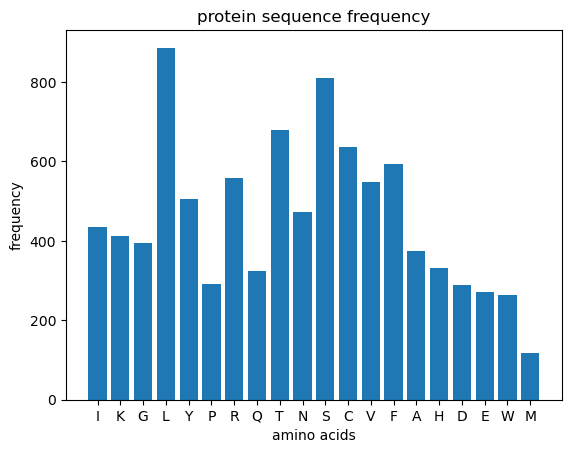

In [83]:
del common_amino['*']
pylab.bar(common_amino.keys(),common_amino.values())
pylab.title("protein sequence frequency")
pylab.xlabel("amino acids")
pylab.ylabel("frequency")

### Since stop codon * signifies end of a protein we can split the sequence using ( * )

In [84]:
protein_list = [str(i) for i in protein_seq.split('*')]
protein_list[:10]

['IKGLYLPR',
 'QTNQLSISCRSVL',
 'TNFKICVAVTRLHA',
 'CTHAV',
 'LITNYCR',
 'QDTSNSSIFCRLLTVSSVLQPIISTSRFRPGVTER',
 'DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS',
 'RWHLWLSRS',
 'KRRFAST',
 'TALCVHQTFGCSNCTSWSCYG']

In [85]:
large_proteins = [x for x in protein_list if len(x) >10]
df=pd.DataFrame({'protein_seq':large_proteins})

In [86]:
df['length'] = df['protein_seq'].apply(len)
df.head()

,protein_seq,length
0,QTNQLSISCRSVL,13
1,TNFKICVAVTRLHA,14
2,QDTSNSSIFCRLLTVSSVLQPIISTSRFRPGVTER,35
3,DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS,46
4,TALCVHQTFGCSNCTSWSCYG,21


In [87]:

df.sort_values(by=['length'],ascending =False)[:10]


,protein_seq,length
118,CTIVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFL...,2701
157,ASAQRSQITLHINELMDLFMRIFTIGTVTLKQGEIKDATPSDFVRA...,290
168,TNMKIILFLALITLATCELYHYQECVRGTTVLLKEPCSSGTYEGNS...,123
158,AQADEYELMYSFVSEETGTLIVNSVLLFLAFVVFLLVTLAILTALR...,83
167,QQMFHLVDFQVTIAEILLIIMRTFKVSIWNLDYIINLIIKNLSKSL...,63
3,DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS,46
93,TMLRCYFPKCSEKNNQGYTPLVVTHNFDFTFSFSPEYSMVFVLFFV,46
188,KSHHIFTEATRSTIECTVNNARESCLYGRALMCKINFSSAIPM,43
116,DVVYTHWYWSGNNSYTGSQYGSRILWWCIVLSVLPLPHRSSKS,43
182,LQTLAANCTICPQRFSVLRNVAHWHGSHTFGNVVDLHRCHQIG,43


In [88]:
one_large_protein =df.nlargest(1,'length')
single_prot = one_large_protein.iloc[0,0]
single_prot

'CTIVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKTNCCRFQEKDEDDNLIDSYFVVKRHTFSNYQHEETIYNLLKDCPAVAKHDFFKFRIDGDMVPHISRQRLTKYTMADLVYALRHFDEGNCDTLKEILVTYNCCDDDYFNKKDWYDFVENPDILRVYANLGERVRQALLKTVQFCDAMRNAGIVGVLTLDNQDLNGNWYDFGDFIQTTPGSGVPVVDSYYSLLMPILTLTRALTAESHVDTDLTKPYIKWDLLKYDFTEERLKLFDRYFKYWDQTYHPNCVNCLDDRCILHCANFNVLFSTVFPPTSFGPLVRKIFVDGVPFVVSTGYHFRELGVVHNQDVNLHSSRLSFKELLVYAADPAMHAASGNLLLDKRTTCFSVAALTNNVAFQTVKPGNFNKDFYDFAVSKGFFKEGSSVELKHFFFAQDGNAAISDYDYYRYNLPTMCDIRQLLFVVEVVDKYFDCYDGGCINANQVIVNNLDKSAGFPFNKWGKARLYYDSMSYEDQDALFAYTKRNVIPTITQMNLKYAISAKNRARTVAGVSICSTMTNRQFHQKLLKSIAATRGATVVIGTSKFYGGWHNMLKTVYSDVENPHLMGWDYPKCDRAMPNMLRIMASLVLARKHTTCCSLSHRFYRLANECAQVLSEMVMCGGSLYVKPGGTSSGDATTAYANSVFNICQAVTANVNALLSTDGNKIADKYVRNLQHRLYECLYRNRDVDTDFVNEFYAYLRKHFSMMILSDDAVVCFNSTYASQGLVASIKNFKSVLYYQNNVFMSEAKCWTETDLTKGPHEFCSQHTMLVKQGDDYVYLPYPDPSRILGAGCFVDDIVKTDGTLMIERFVSLAIDAYPLTKHPNQEYADVFHLYLQYIRKLHDELTGHMLDMYSVMLTNDNTSRYWEPEFYEAMYTPHTVLQAVGACVLCNSQTSLRCGACIRRPFLCCKCCYDHVISTSHKLVLSVNPYVCNAPGCDVTDVTQLYLGGMSY

In [89]:

with open("single_prot.fasta","w") as file:
    file.write(">large protein\n"+single_prot)


## 5. Basic Local Alignment Using NCBI-BLAST

In [90]:

read = SeqIO.read("single_prot.fasta","fasta")
read.seq


Seq('CTIVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKTNCCRFQ...VNN')

In [91]:
%%time
result_handle = NCBIWWW.qblast("blastp","pdb",read.seq)
blast_qresult=SearchIO.read(result_handle,"blast-xml")

CPU times: total: 500 ms
Wall time: 1min 4s


In [92]:
print(blast_qresult[0:5])

Program: blastp (2.15.0+)
  Query: unnamed (2701)
         protein product
 Target: pdb
   Hits: ----  -----  ----------------------------------------------------------
            #  # HSP  ID + description
         ----  -----  ----------------------------------------------------------
            0      1  pdb|7D4F|A  Chain A, RNA-directed RNA polymerase [Sever...
            1      1  pdb|6YYT|A  Chain A, nsp12 [Severe acute respiratory sy...
            2      1  pdb|6XEZ|A  Chain A, RNA-directed RNA polymerase [Sever...
            3      1  pdb|7BW4|A  Chain A, RNA-directed RNA polymerase [Sever...
            4      1  pdb|6XQB|A  Chain A, RNA-directed RNA polymerase [Sever...


In [93]:
seqid = blast_qresult[0]
details = seqid[0]

print(f"\
Sequence ID:{seqid.id}\n\
description:{seqid.description}\n\
E value:    {details.evalue} \n\
Bit Score:  {details.bitscore}\n\
")

Sequence ID:pdb|7D4F|A
description:Chain A, RNA-directed RNA polymerase [Severe acute respiratory syndrome coronavirus 2]
E value:    0.0 
Bit Score:  1938.7



In [94]:
print(f"alignment:\n{details.aln}")

alignment:
Alignment with 2 rows and 926 columns
FKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKT...LQA unnamed
LNRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKT...LQG pdb|7D4F|A


## 6. Reading PDB file

### Retreiving PDB Structure From RCSB PDB

In [95]:
seqid.id

'pdb|7D4F|A'

In [96]:
seqid.id.split('|')[1]


'7D4F'

In [97]:

urllib.request.urlretrieve('https://files.rcsb.org/download/7D4F.pdb',
                           '7D4F.pdb')


('7D4F.pdb', <http.client.HTTPMessage at 0x10cb2e82510>)

### 6.1 Reading PDB file

In [98]:
parser=PDBParser()
structure=parser.get_structure('7D4F',"7D4F.pdb")
structure

<Structure id=7D4F>

### 6.2 Identifying the number of chains

In [99]:
for chain in structure[0]:
    print(f"chain ID: {chain.id}")

chain ID: B
chain ID: C
chain ID: G
chain ID: A


## 7. Visualizing SARS-CoV-19 Protein structure

### 7.1. nglview

In [100]:
nv.demo()

NGLWidget()

In [101]:
view = nv.show_biopython(structure)
view

NGLWidget()

### 7.2. nglview GUI

In [102]:

nv.show_biopython(structure,gui=True)

NGLWidget()

## Observation:<br>
<div style="Font-size:16px">
A. Length 29903 base pairs<br>
B. GC content 37.97<br>
C. Protein content has high L & the largest protein is of length 2701 Amino acid<br>
D. Largest protein BLAST results corresponds to <b>SARS-CoV-19</b> 7D4F <br>
E. Protein 7D4F has 8 chains & a DNA binding domain<br>
</div>